In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
 df = pd.read_csv("18-concrete_data.csv")

In [6]:
df.head()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.99
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.89
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.27
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.05
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.30


In [8]:
df.columns

Index(['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Superplasticizer',
       'Coarse Aggregate', 'Fine Aggregate', 'Age', 'Strength'],
      dtype='object')

In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1030 entries, 0 to 1029
Data columns (total 9 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Cement              1030 non-null   float64
 1   Blast Furnace Slag  1030 non-null   float64
 2   Fly Ash             1030 non-null   float64
 3   Water               1030 non-null   float64
 4   Superplasticizer    1030 non-null   float64
 5   Coarse Aggregate    1030 non-null   float64
 6   Fine Aggregate      1030 non-null   float64
 7   Age                 1030 non-null   int64  
 8   Strength            1030 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 72.6 KB


In [17]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
count,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000,1030.000000
mean,281.167864,73.895825,54.188350,181.567282,6.204660,972.918932,773.580485,45.662136,35.817961
std,104.506364,86.279342,63.997004,21.354219,5.973841,77.753954,80.175980,63.169912,16.705742
min,102.000000,0.000000,0.000000,121.800000,0.000000,801.000000,594.000000,1.000000,2.330000
25%,192.375000,0.000000,0.000000,164.900000,0.000000,932.000000,730.950000,7.000000,23.710000
50%,272.900000,22.000000,0.000000,185.000000,6.400000,968.000000,779.500000,28.000000,34.445000
75%,350.000000,142.950000,118.300000,192.000000,10.200000,1029.400000,824.000000,56.000000,46.135000
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.600000


In [23]:
df.isnull().sum()

Cement                0
Blast Furnace Slag    0
Fly Ash               0
Water                 0
Superplasticizer      0
Coarse Aggregate      0
Fine Aggregate        0
Age                   0
Strength              0
dtype: int64

In [25]:
df.corr()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age,Strength
Cement,1.000000,-0.275216,-0.397467,-0.081587,0.092386,-0.109349,-0.222718,0.081946,0.497832
Blast Furnace Slag,-0.275216,1.000000,-0.323580,0.107252,0.043270,-0.283999,-0.281603,-0.044246,0.134829
Fly Ash,-0.397467,-0.323580,1.000000,-0.256984,0.377503,-0.009961,0.079108,-0.154371,-0.105755
Water,-0.081587,0.107252,-0.256984,1.000000,-0.657533,-0.182294,-0.450661,0.277618,-0.289633
Superplasticizer,0.092386,0.043270,0.377503,-0.657533,1.000000,-0.265999,0.222691,-0.192700,0.366079
Coarse Aggregate,-0.109349,-0.283999,-0.009961,-0.182294,-0.265999,1.000000,-0.178481,-0.003016,-0.164935
Fine Aggregate,-0.222718,-0.281603,0.079108,-0.450661,0.222691,-0.178481,1.000000,-0.156095,-0.167241
Age,0.081946,-0.044246,-0.154371,0.277618,-0.192700,-0.003016,-0.156095,1.000000,0.328873
Strength,0.497832,0.134829,-0.105755,-0.289633,0.366079,-0.164935,-0.167241,0.328873,1.000000


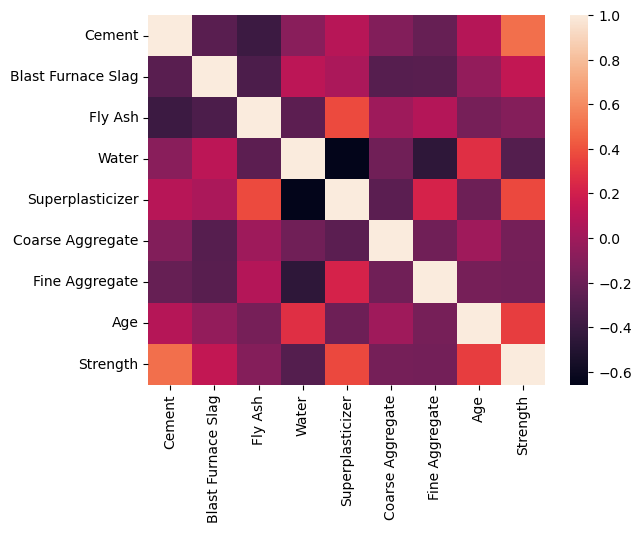

In [27]:
sns.heatmap(df.corr())
plt.show()

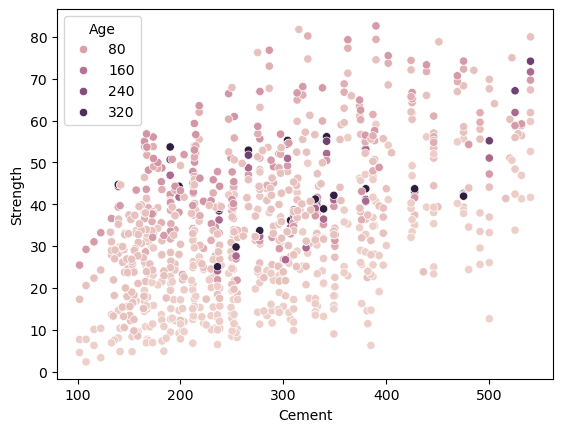

In [33]:
sns.scatterplot(data = df, x="Cement", y="Strength", hue="Age")
plt.show()

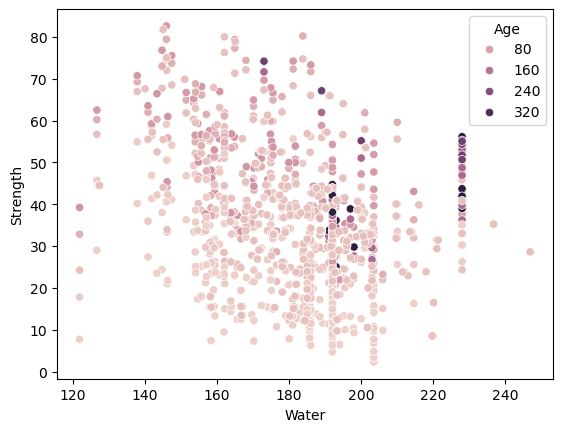

In [35]:
sns.scatterplot(data = df, x="Water", y="Strength", hue="Age")
plt.show()

In [46]:
X = df.drop("Strength", axis=1)
y = df["Strength"]

In [48]:
from sklearn.model_selection import train_test_split 
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=15, test_size=0.25)

In [52]:
from sklearn.tree import DecisionTreeRegressor

In [58]:
#first weak learner
tree_reg1 = DecisionTreeRegressor(max_depth = 3)
tree_reg1.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=3)

In [60]:
y2 = y_train - tree_reg1.predict (X_train) #residual hesaplaması yaptık.

In [65]:
#second weak learner
tree_reg2 = DecisionTreeRegressor(max_depth = 4)

In [67]:
tree_reg2.fit(X_train, y2) #X_traini y2 residuali ile egitiyoruz.

DecisionTreeRegressor(max_depth=4)

In [75]:
y3 = y2 - tree_reg2.predict (X_train) #yeni residual bulundu.

In [77]:
y3[:5]

919   -7.776773
641   -0.353441
535    9.365625
835   -4.303430
583   -3.033962
Name: Strength, dtype: float64

In [79]:
#third weak learner
tree_reg3 = DecisionTreeRegressor(max_depth = 4)
tree_reg3.fit(X_train, y3)

DecisionTreeRegressor(max_depth=4)

In [81]:
y4 = y3 - tree_reg3.predict (X_train) #yeni residual bulundu.

In [85]:
y4[:5]

919   -8.311212
641   -0.887880
535    8.831186
835   -0.209931
583   -0.406351
Name: Strength, dtype: float64

In [87]:
y_pred = sum(tree.predict(X_test) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [89]:
from sklearn.metrics import r2_score

In [91]:
r2_score (y_test, y_pred)

0.8159494658632221

In [93]:
from sklearn.ensemble import GradientBoostingRegressor

In [106]:
gbr=GradientBoostingRegressor(n_estimators = 100, max_depth = 3, learning_rate = 0.1)

In [108]:
gbr.fit(X_train, y_train) #X_train → Girdi verileri (feature’lar) -> y_train → Doğru cevaplar (label)
y_pred = gbr.predict(X_test)
r2_score(y_test, y_pred)

0.924730619815904

In [111]:
#hyperparameter tuning

In [113]:
params = {
        "n_estimators" : [100, 150, 200],
        "max_depth" : [3,4,5],
        "loss" : ["squared_error", "absolute_error", "huber", "quantile"],
        "learning_rate" : [0.01, 0.1, 0.5]
}

In [115]:
from sklearn.model_selection import RandomizedSearchCV

In [117]:
rscv = RandomizedSearchCV(estimator=GradientBoostingRegressor(), param_distributions=params, cv=5)

In [119]:
rscv.fit(X_train, y_train)

RandomizedSearchCV(cv=5, estimator=GradientBoostingRegressor(),
                   param_distributions={'learning_rate': [0.01, 0.1, 0.5],
                                        'loss': ['squared_error',
                                                 'absolute_error', 'huber',
                                                 'quantile'],
                                        'max_depth': [3, 4, 5],
                                        'n_estimators': [100, 150, 200]})

In [121]:
rscv.best_params_

{'n_estimators': 100, 'max_depth': 4, 'loss': 'huber', 'learning_rate': 0.5}

In [123]:
y_pred = rscv.predict(X_test)
r2_score(y_test, y_pred)

0.9432728889036719